In [86]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model 
import pandas as pd
import os
from IPython.display import display

Extract Vietnam's data ...

In [65]:
def get_data(filepath):
    df = pd.read_csv(filepath)
    df = df[df['iso_code'] == 'VNM']
    df = df.reset_index()
    df['date'] = pd.to_datetime(df['date'])
    # Drop unused collumns
    df = df.drop(['index', 'iso_code', 'continent', 'location', 'icu_patients', 'icu_patients_per_million', 'hosp_patients',
            'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million',
            'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_boosters',
            'total_boosters_per_hundred', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
            'excess_mortality_cumulative', 'excess_mortality_cumulative_per_million', 'excess_mortality',
            'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed',
            'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units',
            'new_vaccinations_smoothed_per_million', 'people_fully_vaccinated_per_hundred',
            'people_vaccinated_per_hundred', 'total_vaccinations_per_hundred', 'new_vaccinations_smoothed',
            'new_cases_smoothed', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million',
            'new_cases_smoothed_per_million', 'new_cases_smoothed_per_million', 'new_cases_smoothed_per_million',
            'new_deaths_per_million', 'new_deaths_smoothed_per_million','total_deaths_per_million'], axis=1)

        # fill NaN values with 0s
    df.iloc[:, 3:13] = df.iloc[:, 3:13].fillna(0)
    df['reproduction_rate'] = df['reproduction_rate'].fillna(value=0, limit=1)
    df['reproduction_rate'] = df['reproduction_rate'].fillna(method='ffill')
    df['new_tests'] = df['new_tests'].fillna(0)
    df['total_tests'] = df['total_tests'].fillna(method='ffill')
    df['total_tests'] = df['total_tests'].fillna(value=0, limit=1)
    df['total_tests'] = df['total_tests'].fillna(method='ffill')
    df.iloc[:, 16:20] = df.iloc[:, 16:20].fillna(value=0, limit=1)
    df.iloc[:, 16:21] = df.iloc[:, 16:21].fillna(method='ffill')
    df['stringency_index']=df['stringency_index'].replace(to_replace=0,method='ffill')
    df.at[21, 'new_tests'] = 856
    df.isna().sum()
    return df

In [120]:
def plot_data(x, y,x_axis,y_axis):
    plt.scatter(x, y, color='r')
  
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
  
    plt.show()

Paths...

In [67]:
parent_folder = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) # directory to main project: ..\DoAnCovid
folders = {"vn_data":"vn_data","data":"data"} # folders name

Process data...

In [68]:
filename = "owid-covid-data.csv"
filepath = parent_folder+"\\"+folders['data']+"\\"+filename
data = get_data(filepath)

Inspect data frame ...

In [69]:
display(data)

,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,new_tests,total_tests,total_vaccinations,people_vaccinated,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,2020-01-23,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6171.884,2.0,245.465,6.0,1.0,45.9,85.847,2.6,75.4,0.704
1,2020-01-24,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6171.884,2.0,245.465,6.0,1.0,45.9,85.847,2.6,75.4,0.704
2,2020-01-25,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6171.884,2.0,245.465,6.0,1.0,45.9,85.847,2.6,75.4,0.704
3,2020-01-26,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6171.884,2.0,245.465,6.0,1.0,45.9,85.847,2.6,75.4,0.704
4,2020-01-27,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6171.884,2.0,245.465,6.0,1.0,45.9,85.847,2.6,75.4,0.704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,2022-01-06,1843563.0,25842.0,33644.0,169.0,0.0,0.0,0.0,157740557.0,78146683.0,...,6171.884,2.0,245.465,6.0,1.0,45.9,85.847,2.6,75.4,0.704
715,2022-01-07,1859841.0,16278.0,33877.0,233.0,0.0,0.0,0.0,0.0,0.0,...,6171.884,2.0,245.465,6.0,1.0,45.9,85.847,2.6,75.4,0.704
716,2022-01-08,1876394.0,16553.0,34117.0,240.0,0.0,0.0,0.0,160033187.0,78247751.0,...,6171.884,2.0,245.465,6.0,1.0,45.9,85.847,2.6,75.4,0.704
717,2022-01-09,1899575.0,23181.0,34319.0,202.0,0.0,0.0,0.0,161277807.0,78291624.0,...,6171.884,2.0,245.465,6.0,1.0,45.9,85.847,2.6,75.4,0.704


In [116]:
print(data.columns) # collumns title

Index(['date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
       'reproduction_rate', 'new_tests', 'total_tests', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')


Plot size...

In [142]:
x_size, y_size = 10,10
# x_size, y_size = data["total_cases"].max(),data["total_deaths"].max()
plt.rcParams['figure.figsize'] = [x_size, y_size]

Total deaths over time...

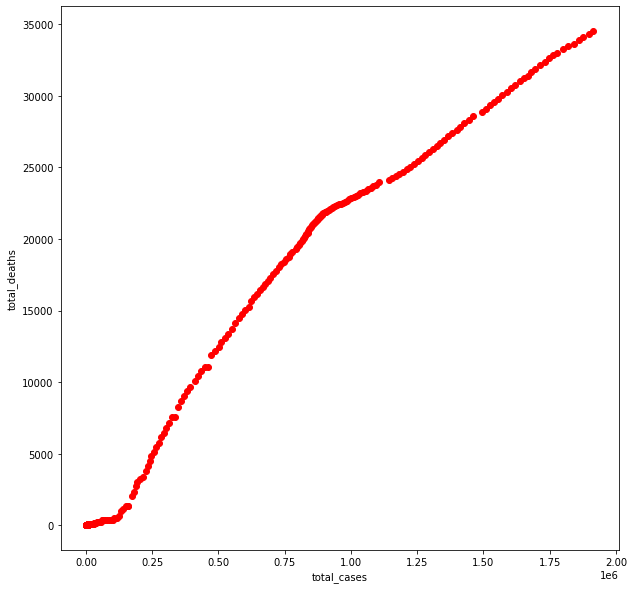

In [143]:
plot_data(data.iloc[:,1],data.iloc[:,3],data.columns[1],data.columns[3])

In [144]:
def preprocess(x, y):
    A = np.hstack((np.ones((x.shape[0], 1)), x))
    
    return A, y

def ols_linear_regression(A, b):
    A_pinv = np.linalg.inv(A.T @ A) @ A.T    # np.linalg.pinv(A)
    x = A_pinv @ b
    
    return x

In [149]:

A1 = np.array(data.iloc[:,:3])
y1 = np.array(data.iloc[:,[3]]) 
A1,y1 = preprocess(A1,y1)
B1 = ols_linear_regression(A1,y1)

print('y = ',end="")
for i in range(len(B1)):
    if(i == 0):
        print(B1[i],' + ',end = "")
    elif i == len(B1) -1:
        print(B1[i] ,"*x" + str(i), end ="")
    else:
        print(B1[i] ,"*x" + str(i) +' + ', end ="")

TypeError: unsupported operand type(s) for *: 'float' and 'Timestamp'